In [ ]:
#https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

In [ ]:
    # Step 1: Define the Problem
#주어진 타이타닉 데이터를 이용해 머신러닝 모델을 만들고 정확도 향상

    #Step 2: Gather the Data
#Kaggle에서 데이터 가져오기
#variable notes
#PassengerIdUnique ID of the passenger
#SurvivedSurvived (1) or died (0)
#PclassPassenger's class (1st, 2nd, or 3rd)
#NamePassenger's name
#SexPassenger's sex
#AgePassenger's age
#SibSpNumber of siblings/spouses aboard the Titanic
#ParchNumber of parents/children aboard the Titanic
#TicketTicket number
#FareFare paid for ticket
#CabinCabin number
#Embarked Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

# Step 3: Prepare Data for Consumption

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
t_train = pd.read_csv('../data/Titanic/train.csv')
t_test = pd.read_csv('../data/Titanic/test.csv')

In [308]:
#두 파일을 묶어 데이터 전처리 준비
data_cleaner = [t_train, t_test]

In [309]:
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [310]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
#필요없는 컬럼 제거
drop_column = ['PassengerId','Cabin', 'Ticket']
for dataset in data_cleaner : 
    dataset.drop(drop_column, axis=1, inplace = True)

In [219]:
#결측치 제거
for dataset in data_cleaner:    
    #결측치를 중간값으로 대체
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #결측치를 가장 많은 빈도의 항구로 대체
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #결측치를 중간값으로 대체
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [220]:
#상호작용/다항식 추가
for dataset in data_cleaner :    
    #가족 수 추가
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    #혼자 여행 여부 추가
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #타이틀만 가져와서 칼럼 생성
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [221]:
#타겟값 설정
t_train.target = t_train['Survived']

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [222]:
#타겟값으로 쓰일 컬럼 제거, 필요없는 이름 컬럼 제거
t_train.data = t_train.drop(["Survived","Name"], axis = 1)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [227]:
print(t_train.data.shape)

(891, 10)


In [231]:
data_dummies = pd.get_dummies(t_train.data)

In [232]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
Pclass                891 non-null int64
Age                   891 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsAlone               891 non-null int64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Title_Capt            891 non-null uint8
Title_Col             891 non-null uint8
Title_Don             891 non-null uint8
Title_Dr              891 non-null uint8
Title_Jonkheer        891 non-null uint8
Title_Lady            891 non-null uint8
Title_Major           891 non-null uint8
Title_Master          891 non-null uint8
Title_Miss            891 non-null uint8
Title_Mlle            891 non-

In [229]:
t_test = t_test.drop('Name', axis = 1)

In [230]:
print(t_test.shape)

(418, 10)


# Step 4: Perform Exploratory Analysis with Statistics

In [123]:
train_clean.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [247]:
train_clean.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [121]:
train_clean = pd.concat([t_train.data, t_train.target], axis=1)

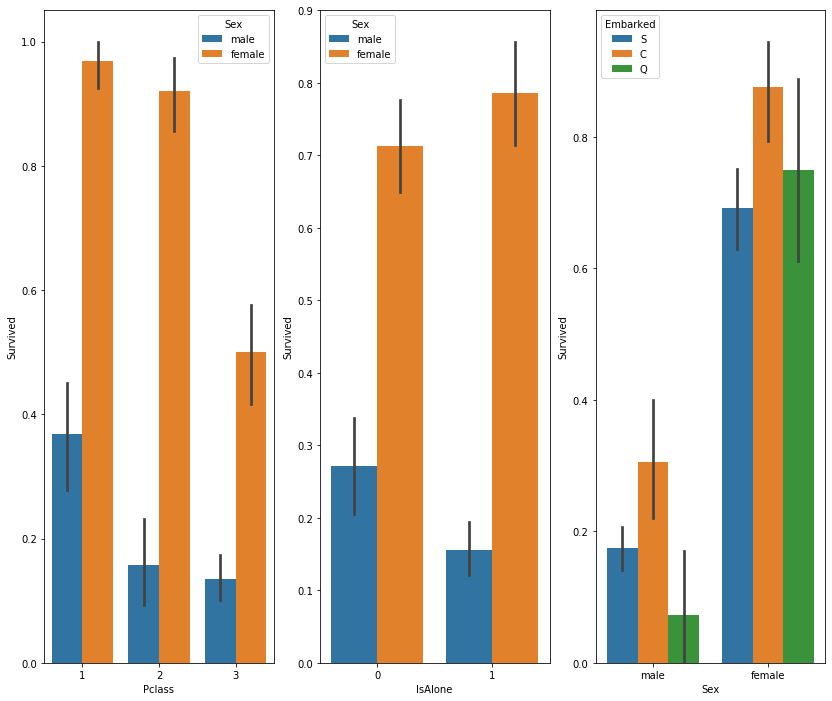

In [131]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x = 'Pclass', y = 'Survived', data = train_clean, hue = 'Sex',ax = qaxis[0])
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_clean, hue = 'Sex',ax = qaxis[1])
sns.barplot(x = 'Sex', y = 'Survived', data = train_clean, hue = 'Embarked',ax = qaxis[2])

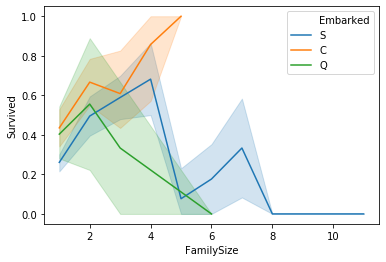

In [133]:
sns.lineplot(x = 'FamilySize', y = 'Survived',hue = 'Embarked', data = train_clean)

# Step 5: Model Data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dummies, t_train.target, random_state = 0)

In [95]:
print(X_train.shape)
print(X_test.shape)

(668, 29)
(223, 29)


In [143]:
#결정트리
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

tree.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(data_dummies, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.862
테스트 세트 점수: 0.816


In [245]:
#결정트리 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['dead', 'alive'],
                feature_names = data_dummies.columns, impurity = False, filled = True)

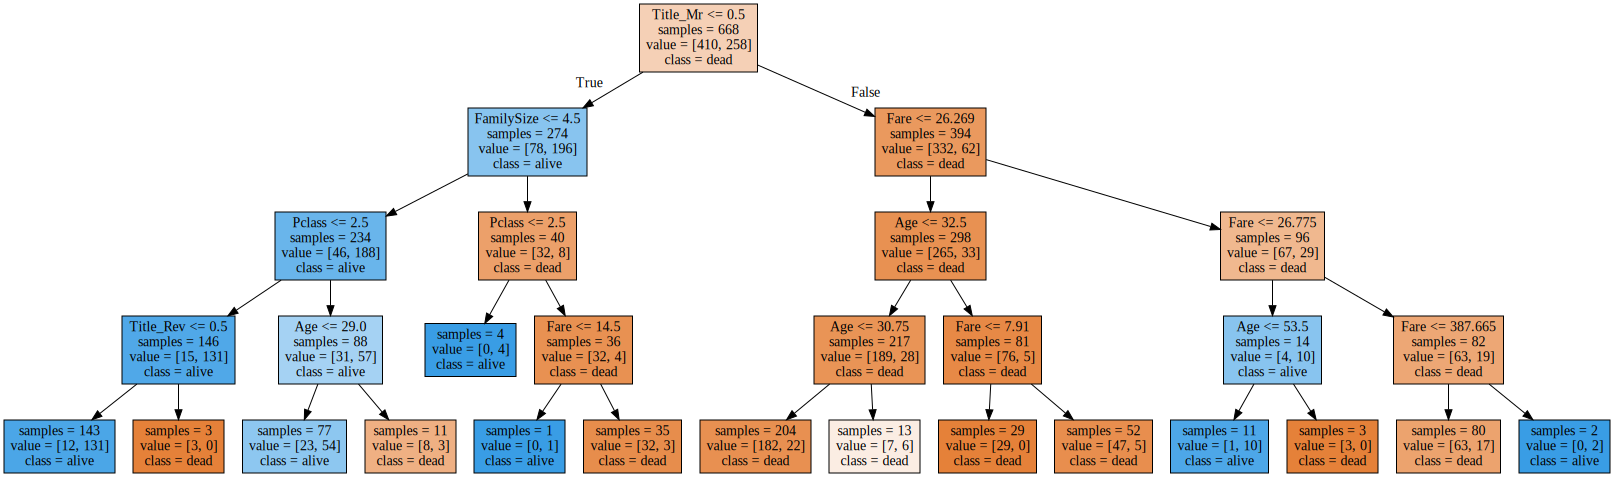

In [246]:
import graphviz

with open(("tree.dot"), 'r', encoding = "utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(data_dummies, t_train.target)

In [297]:
#랜덤포레스트 적용
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2) 
forest.fit(data_dummies, t_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [298]:
print("훈련 세트 점수: {:.3f}".format(forest.score(data_dummies, t_train.target)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.961
테스트 세트 점수: 0.969


In [305]:
#나무 수 20개로 변경
forest = RandomForestClassifier(n_estimators = 20, random_state = 2) 
forest.fit(data_dummies, t_train.target)
print("훈련 세트 점수: {:.3f}".format(forest.score(data_dummies, t_train.target)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))  

훈련 세트 점수: 0.981
테스트 세트 점수: 0.982


# Step 6: Validate and Implement

In [261]:
t_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,34.5,0,0,7.8292,Q,1,1,Mr
1,3,female,47.0,1,0,7.0000,S,2,0,Mrs
2,2,male,62.0,0,0,9.6875,Q,1,1,Mr
3,3,male,27.0,0,0,8.6625,S,1,1,Mr
4,3,female,22.0,1,1,12.2875,S,3,0,Mrs
5,3,male,14.0,0,0,9.2250,S,1,1,Mr
6,3,female,30.0,0,0,7.6292,Q,1,1,Miss
7,2,male,26.0,1,1,29.0000,S,3,0,Mr
8,3,female,18.0,0,0,7.2292,C,1,1,Mrs
9,3,male,21.0,2,0,24.1500,S,3,0,Mr


In [236]:
data_dummies2 = pd.get_dummies(t_test)

In [257]:
data_dummies2.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Col', 'Title_Dona', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev'],
      dtype='object')

In [272]:
g = ['Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Sir',
 'Title_the Countess']
for i in g :
    data_dummies2[i] = 0

In [294]:
h = set(data_dummies2.columns) - set(X_test.columns)
h

{'Title_Dona'}

In [290]:
data_dummies2.shape

(418, 30)

In [295]:
X_test['Title_Dona'] = 0
X_test.shape

(223, 30)

In [300]:
predictions = forest.predict(data_dummies2)

In [1]:
predictions = pd.DataFrame(predictions, columns=['Survived'])

NameError: name 'pd' is not defined

In [302]:
test = pd.read_csv('../data/Titanic/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('y_test_Random_Forest.csv', sep=",", index = False)

In [ ]:
#score : 0.73684